Accessing Documentation

Jupyter has useful shortcuts. Add a single '?' after a function or class get a window with the documentation, or a double '??' to pull up the source code.

### Import numpy for examples
import numpy as np

### Check the docs for a numpy array
np.array?

### Check the full source code for numpy append function
np.append??

### Get information about a variable you've created
my_string?

Magic Commands

'Magic Commands' are a special (command-line like) syntax in IPython/Jupyter to run special functionality. They can run on lines and/or entire cells.

The iPython documentation has more information on magic commands.
Magic commands are designed to succinctly solve various common problems in standard data analysis. Magic commands come in two flavors: line magics, which are denoted by a single % prefix and operate on a single line of input, and cell magics, which are denoted by a double %% prefix and operate on multiple lines of input.

### Access quick reference sheet for interactive Python (this opens a reference guide)
%quickref

### Check a list of available magic commands
%lsmagic

### Check the current working directory
%pwd

### Check all currently defined variables
%who

### Check all variables, with more information about them
%whos

### Check code history
%hist

In [2]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

### Line Magics

Line magics use a single ‘%’, and apply to a single line.

### For example, we can time how long it takes to create a large list
%timeit list(range(100000))

In [3]:
%timeit list(range(10000))

302 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Cell Magics

Cell magics use a double ‘%%’, and apply to the whole cell.

%%timeit
### For example, we could time a whole cell
a = list(range(100000))
b = [n + 1 for n in a]

Running terminal commands

Another nice thing about notebooks is being able to run terminals commands

### You can run a terminal command by adding '!' to the start of the line
!pwd

### Note that in this case, '!pwd' is equivalent to line magic '%pwd'. 
### The '!' syntax is more general though, allowing you to run anything you want through command-line 
%%bash

### Equivalently, (for bash) use the %%bash cell magic to run a cell as bash (command-line)
pwd

### List files in directory
!ls

### Change current directory
!cd .

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Prediction

### Estimate dogs weight based on its length

[Text(0.5, 0, 'Length (cm)'),
 Text(0, 0.5, 'Weight (kg)'),
 (30.0, 125.0),
 (5.0, 25.0)]

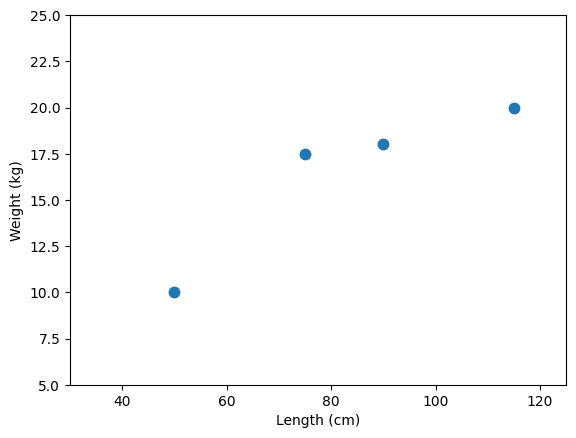

In [5]:
lengths = [75, 50, 90, 115]    # cm's
weights = [17.5, 10, 18, 20]   # kg's

fig, ax = plt.subplots()
ax.plot(lengths, weights, '.', ms = 15)
ax.set(xlabel='Length (cm)', ylabel = 'Weight (kg)', xlim = [30,125], ylim = [5,25])

In [6]:
# Polyfit (degree=1) will fit a linear fit to the data, of the form y = ax + b
#  Once we fit this simple model to the data, we can use it to predict from new data points

a, b = np.polyfit(lengths, weights, 1)

In [7]:
new_length  = 62
pred_weight = a * new_length + b

print('Predicted weight for a new data point, weight is {:1.2f}.'.format(pred_weight))

Predicted weight for a new data point, weight is 13.35.


### To check how the prediction fits

In [8]:
ax.plot(new_length, pred_weight, '.r', ms = 15)

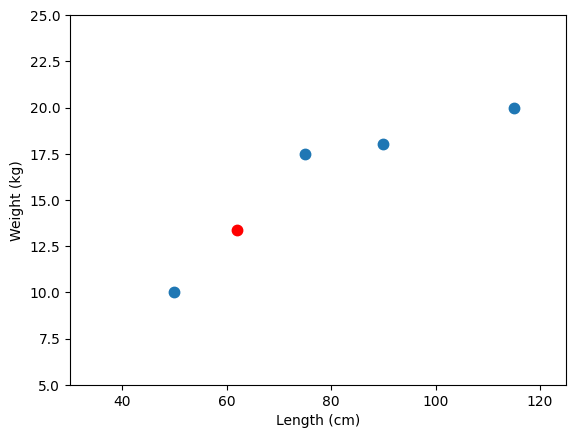

In [9]:
fig

### If we actually know the true weight we can check the error, how good our prediction

In [10]:
actual_weight = 14.7

error = actual_weight - pred_weight

print('The (absolute) error of our prediction is {:1.2f} kilograms.'.format(error))

The (absolute) error of our prediction is 1.35 kilograms.


# Classification

Classification (or clustering) is the process of trying to discover a systematic organization of data.

Problem

Let’s now imagine our local zoologist is investigating a group of squirrels.

She would like to know how many different species there are present in the population. However, she only has a limited set of basic data to work with.

We can try and cluster the data we have, and look for (what look like) meaningful groupings.

In this case, let’s imagine we were able to weigh and measure a selection of squirrels that otherwise look about the same.

Our task is then to analyze the data to see if there appear to be any meaningful groupings.

In [11]:
# We observe a bunch of squirrels with [height (cm), weight (grams)] pairs
data = np.array([[10., 600.], [16., 1200], [6., 800], [12., 700.], [17., 1400.],
                [8., 500.], [20., 1500.], [21., 1300.], [11., 800.], [18., 1100.]])
print(data[:,1].max())

1500.0


[Text(0.5, 0, 'Height(cm)'),
 Text(0, 0.5, 'Weight(g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

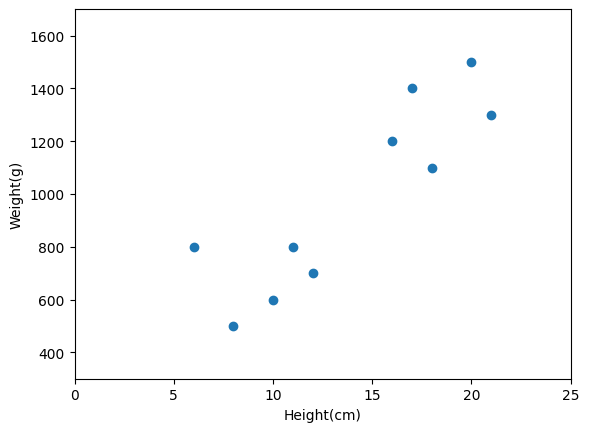

In [12]:
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:, 1], '.', ms = 12)
#  ms hogy mekkora legyen a pont, ami itt a 12 ilyen ideális a 100 vicces
ax.set(xlabel = 'Height(cm)', ylabel = 'Weight(g)', xlim=[0,25], ylim = [300,1700])

### importing classification algorithm

In [13]:
from sklearn.cluster import KMeans

In [14]:
# K-means is a partitioning method that divides a dataset into 'k' distinct, 
# non-overlapping subsets (clusters) based on similarity, ig that's why it is good for classification

kmeans = KMeans(2).fit(data)

In [15]:
# this gives a label for every datapoint visible on the plot

kmeans.labels_

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [16]:
cl_1 = data[kmeans.labels_ == 0]
cl_2 = data[kmeans.labels_ == 1]

[Text(0.5, 0, 'Height(cm)'),
 Text(0, 0.5, 'Weight(g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

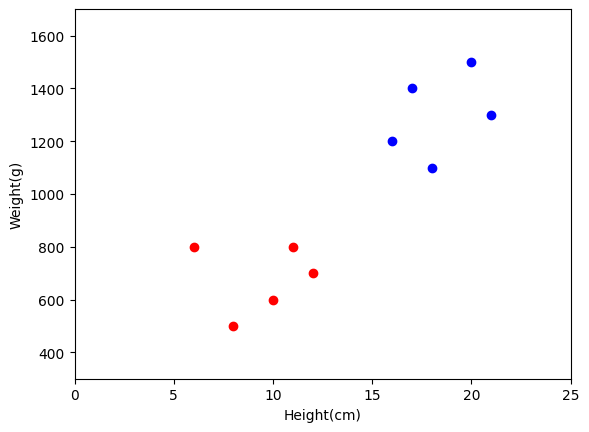

In [19]:
# 1) creates the empty koordinátarendszer
fig, ax = plt.subplots()

# 2) plot cluster 1
ax.plot(cl_1[:,0], cl_1[:,1], '.b', ms=12)
ax.plot(cl_2[:,0], cl_2[:,1], '.r', ms = 12)
ax.set(xlabel = 'Height(cm)', ylabel= 'Weight(g)', xlim=[0,25], ylim = [300,1700])

this is a good partition, but not an evaluated classification

unsupervised , we don't know the answer or have any labels

### Knowledge Discovery

#### Knowledge Discovery is the attempt to learn new things about the world from data.

Knowledge discovery is not necessarily methodologically distinct from prediction and classification. Seeking new knowledge will likely include analysis focused on classification and prediction, and other related analyses.

However, we can consider that the data science problems can have different contexts and approaches. Asking how predict one known variable from another (such as a dog’s weight from it’s length), or to classify data into a previously known categorization scheme (such as labeling different kinds of species) are tasks that use data science to answer previously known questions.

Sometimes, in data analyses, we also want to explore and discover new findings and ideas from a dataset without having pre-defined questions. We might try to ask about the structure of the data, or look for new patterns we didn’t know before. This is sometimes also called ‘exploratory data analysis’, as opposed to ‘hypothesis driven’ work.